# Categorical Plot
- categorical な項目に対しての　plot をいう

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
df = pd.read_csv('../pandas/dataset/tmdb_5000_movies.csv')

In [60]:
# vote avevageが下位50%だった時は low, 上位50%以上だったら high

# filter 0以外のモノ　（0は除く）
df = df[(df['vote_average'] != 0) & (df['revenue'] !=0)]

# median( )は処理が重いため別変数にしておく
vote_average_median = df['vote_average'].median()

# vote averageが下位50%だったらlow, 上位50%だったらhigh
df['evaluation'] = df['vote_average'].apply(lambda x: 'high' if x > vote_average_median else 'low')
df[['vote_average', 'revenue']]

,vote_average,revenue
0,7.2,2787965087
1,6.9,961000000
2,6.3,880674609
3,7.6,1084939099
4,6.1,284139100
...,...,...
4775,6.3,76901
4788,6.2,6000000
4792,7.4,99000
4796,6.9,424760


## sns.barplot( )
- 平均値, 中央値, などを算出して値を見比べる時によく使用される
    - **default は平均値が出力される**


- <u>平均値を自動で算出して棒グラフとして出力してくれるので非常に便利</u>

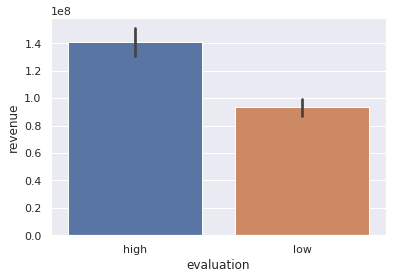

In [61]:
sns.set()
sns.barplot(x='evaluation', y='revenue', data=df)

- *縦棒は　error bar　と呼ばれるもの*
    - **seaborn では　95%　の信頼区間　( CI : confidence interval )**
        - 母集団の推定量を比較する時に使用される
            - **母集団**　:　世界全てに存在する data
            - **標本データ**　:　今回取得してきた data


- <u>標本データで算出した high, low 平均data を元に母集団の　high, low 平均を推定した　dataが縦棒</u>
    - data science では、よくこのような考え方が必要になってくる
    - *使用する data 全ての裏には母集団が隠れている*

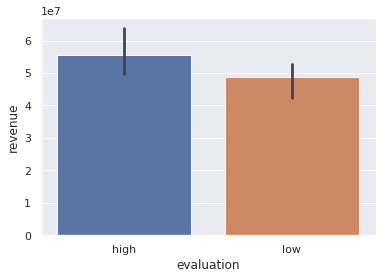

In [62]:
# 中央値 : estimaor= np.median
sns.barplot(x='evaluation', y='revenue', data=df, estimator=np.median)

## sns.countplot( )

In [63]:
# release data から　year を作成

# NaN を排除（errorが出てしまう為） / NOT演算を使用する : isna() NaN 以外を抽出
df = df[~df['release_date'].isna()]

# year columns を作成
df['year'] = df['release_date'].apply(lambda x: x[:4])
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,evaluation,year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,high,2009


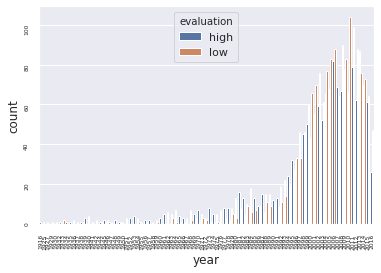

In [64]:
ax = sns.countplot(x='year', data=df, hue='evaluation')
ax.tick_params(rotation=90, labelsize=6)

#### xticks がすごく見づらいので　１０年毎に区切って表示させる

In [67]:
# 年代を１０年おきにする columns (decade) 2012 -> 201 + 0s = 2010s　/ 最初の３文字を取ってきて + 0s をする
df['decade'] = df['release_date'].apply(lambda x: x[:3] + '0s')

In [69]:
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,evaluation,year,decade
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,high,2009,2000s


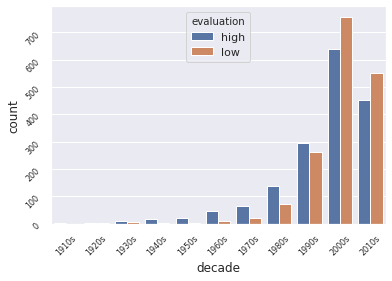

In [78]:
ax = sns.countplot(x='decade', data=df.sort_values('decade'), hue='evaluation')
ax.tick_params(rotation=45, labelsize=8)

## sns.boxplot( )

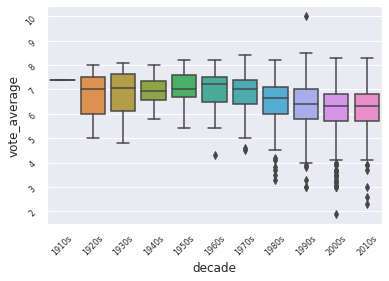

In [80]:
ax = sns.boxplot(x='decade', y='vote_average', data=df.sort_values('decade'))
ax.tick_params(rotation=45, labelsize=8)

## sns.violinplot( )

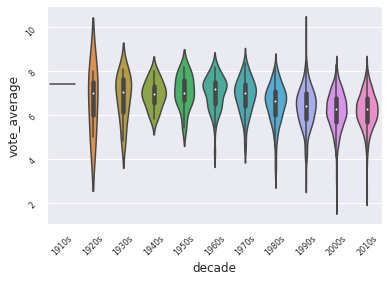

In [81]:
ax = sns.violinplot(x='decade', y='vote_average', data=df.sort_values('decade'))
ax.tick_params(rotation=45, labelsize=8)

## sns.swarmplot( )

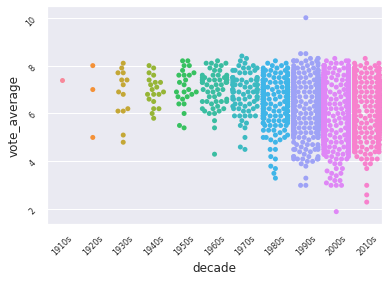

In [83]:
ax = sns.swarmplot(x='decade', y='vote_average', data=df.sort_values('decade'))
ax.tick_params(rotation=45, labelsize=8)

- *実際のdataの分布をプロットしてくれる*
    - **swarmplot するとどの年代にどのくらいの数のdataが分布しているか凄くわかりやすい**

### Seaborn で figure size 変更

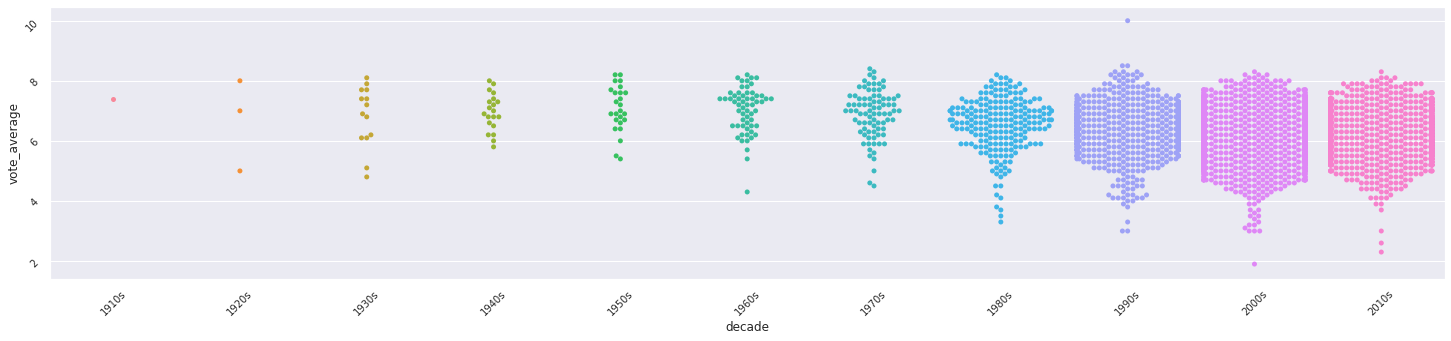

In [87]:
fig, ax = plt.subplots(figsize=(25, 5))
sns.swarmplot(ax=ax, x='decade', y='vote_average', data=df.sort_values('decade'))
ax.tick_params(rotation=45, labelsize=10)

#### Seaborn の戻り値は axes の object である